In [1]:
%pylab inline
import soda

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [40]:
sat_pos = np.array([-1, -41, -28])
sat_vel = np.array([-57, -226, 221])
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1E12, 261, 9.86]
disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]
alpha = [0, 0.4]
time = 0.1
d_t = 0.001

In [41]:
# From Gomez 15 et al
sat_mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
sat_rs = [8, 11, 14, 15, 20, 22.5]
sat_model = ['hernquist', sat_mass[4], sat_rs[4]]


In [42]:
satellite_orbits=np.genfromtxt('MW_dwarfs_6D.csv', delimiter=',')

x = satellite_orbits[:,1]
y = satellite_orbits[:,2]
z = satellite_orbits[:,3]

vx = satellite_orbits[:,6]
vy = satellite_orbits[:,7]
vz = satellite_orbits[:,8]



In [43]:
names = ['Fornax', 'Sculptor', 'Carina', 'Draco', 'LeoI', 'UrsaMinor', 'Sextants', 'LeoII',
         'Sagittarius', 'SMC', 'LMC']

In [44]:
def write_orbits(file_name, t, x, y, z, vx, vy, vz):
    f=open(file_name+'_orbit.txt', 'w')
    f.write('# t(Myrs), x_gal(kpc), y_gal(kpc), z_gal(kpc), vx_gal(km/s), vy_gal(km/s),'\
            'vz_gal(km/s) \n')
    for i in range(len(x)):
        f.write("{:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} \n".format(t[i]*1000, x[i], y[i], z[i],\
                                                                             vx[i], vy[i], vz[i]))
    f.close()
    

In [45]:
for i in range(len(names)):
    pos_p = [x[i], y[i], z[i]]
    vel_p = [vx[i], vy[i], vz[i]]
    t, xyz_sat, vxyz_sat, xyz_host, vxyz_host, xyz_p, vxyz_p = soda.leapfrog.integrate_sat(time, pos_host, 
                                                                                           vel_host, host_model,
                                                                                           disk_params, 
                                                                                           bulge_params, 
                                                                                           alpha=alpha,
                                                                                           dt=d_t,
                                                                                           satellite_model=sat_model,
                                                                                           pos_sat=sat_pos, 
                                                                                           vel_sat=sat_vel,
                                                                                           pos_p=pos_p, 
                                                                                           vel_p=vel_p)
    write_orbits(names[i], t, xyz_p[:,0]-xyz_host[:,0], xyz_p[:,1]-xyz_host[:,1], xyz_p[:,2]-xyz_host[:,2],
            vxyz_p[:,0]-vxyz_host[:,0], vxyz_p[:,1]-vxyz_host[:,1], vxyz_p[:,2]-vxyz_host[:,2])

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0


In [36]:
write_orbits(names[0], t, xyz_p[:,0]-xyz_host[:,0], xyz_p[:,1]-xyz_host[:,1], xyz_p[:,2]-xyz_host[:,2],
            vxyz_p[:,0]-vxyz_host[:,0], vxyz_p[:,1]-vxyz_host[:,1], vxyz_p[:,2]-vxyz_host[:,2])

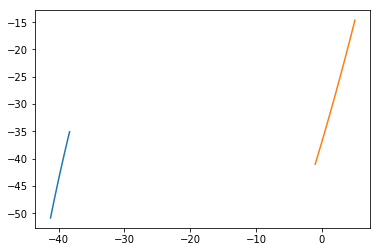

In [26]:
plot(xyz_p[:,0], xyz_p[:,1])
plot(xyz_sat[:,0], xyz_sat[:,1])